In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gender = pd.read_csv('Datasets/weight-height.csv')

gender.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


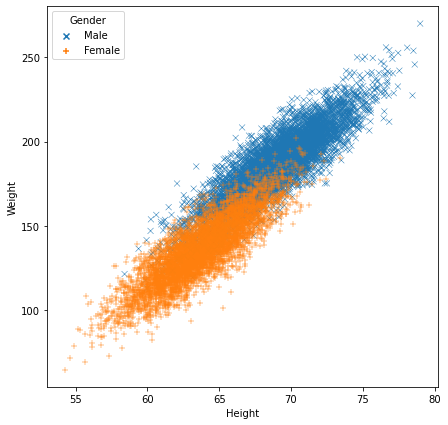

In [20]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='Height', y='Weight', hue='Gender', 
                data=gender, style='Gender', markers=['x', '+'])
plt.show()

In [4]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr = 0.01, n_iter = 100):
        self.lr = lr
        self.n_iter = n_iter
        self.weight = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initial parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iter):
            # Linear part of Logistic regression 
            z = np.dot(X, self.weights) + self.bias
            
            # Non-linear part with Sigmoid 
            y_update = self.sigmoid(z)
            resid = y_update - y

            # Gradient descent 
            dw = np.dot(X.T, resid)/n_samples
            db = np.sum(resid)/n_samples
            
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.round(y_pred)
    
    def coef(self):
        return self.weights, self.bias

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

In [5]:
X = gender[['Height', 'Weight']]
y, labels = gender['Gender'].factorize()

In [6]:
gender.isna().any()

Gender    False
Height    False
Weight    False
dtype: bool

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [9]:
model = LogisticRegression(lr=0.6, n_iter=500)
model.fit(X, y)
y_pred = model.predict(X)

mean_accuracy = sum(y == y_pred)/len(y)
print('Mean Accuracy = {}%'.format(100 * mean_accuracy))

Mean Accuracy = 91.5%


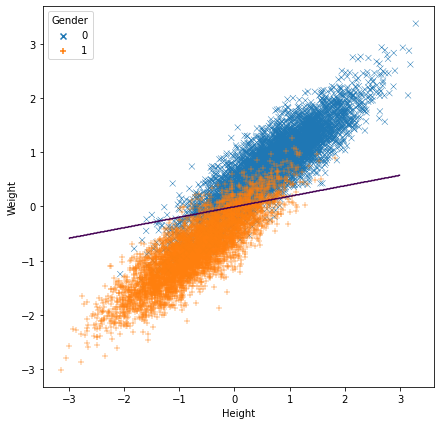

In [54]:
x_range = np.linspace(-3, 3, 500)
y_range = np.linspace(-3, 3, 500)
mesh_x, mesh_y = np.meshgrid(x_range, y_range)
plot_grid = np.c_[mesh_x.ravel(), mesh_y.ravel()]
pred_grid = model.predict(plot_grid)
pred_grid = pred_grid.reshape(mesh_x.shape)

df_normalized = pd.DataFrame(X, columns=['Height', 'Weight'])
df_normalized['Gender'] = y

plt.figure(figsize=(7, 7))
plt.contour(mesh_x, mesh_y, pred_grid, levels=[0.5])

sns.scatterplot(x='Height', y='Weight', hue='Gender',
                data=df_normalized, style='Gender', markers=['x', '+'])
plt.show()